# Zero-Shot-Classification  with Flan-T5

## Requirements

In [ ]:
!pip install stormtrooper[torch]

  Preparing metadata (setup.py) ... done
  Created wheel for thefuzz: filename=thefuzz-0.18.0-py2.py3-none-any.whl size=18199 sha256=cd7326f9735f677665500699e3ebefca74f9c904f52053a0568d8b8553b48909
  Stored in directory: /root/.cache/pip/wheels/8f/5b/ba/9b1a261ddd5216f10d8c6b14007d5db4b1aa16a4556d682031
Successfully built thefuzz


In [ ]:
from stormtrooper import Text2TextZeroShotClassifier
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, f1_score, recall_score, precision_score, ConfusionMatrixDisplay

/usr/local/lib/python3.10/dist-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Binary Classification

## Loading Data

In [ ]:
edus_dataset = pd.read_excel('Edus+Annotations Data.xlsx')
edus_dataset

,Annotated Text,Label,Anno_name_x,matches,Edu Speech,Anno_name_y,Appraisal?
0,wishes to express its satisfaction,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,Uruguay wishes to express its satisfaction for...,Uruguay wishes to express its satisfaction for...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes
1,NaN,NaN,NaN,None,(2016).,UNSC_2016_SPV.7643_spch018_ann_Uruguay,no
2,we want to thank,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,"At the outset, we want to thank the United Sta...","At the outset, we want to thank the United Sta...",UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes
3,is very pleased,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,Uruguay is very pleased to join the rest of th...,Uruguay is very pleased to join the rest of th...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes
4,problem,appreciation-negative,UNSC_2016_SPV.7643_spch018_ann_Uruguay,that dealing with this problem can no longer b...,that dealing with this problem can no longer b...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes
...,...,...,...,...,...,...,...
6445,NaN,NaN,NaN,None,Let us ensure,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,no
6446,criminal decree,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,that are currently enshrined in the criminal d...,that are currently enshrined in the criminal d...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes
6447,NaN,NaN,NaN,None,and let us stop that decree from being impleme...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,no
6448,extremely significant consequences,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,That would have extremely significant conseque...,That would have extremely significant conseque...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes


In [ ]:
#Text to be classified
edus_dataset.iloc[0]['Edu Speech']

'Uruguay wishes to express its satisfaction for the adoption earlier in this meeting of resolution 2272'

In [ ]:
edus_dataset.shape

(6450, 7)

In [ ]:
# Extracting gold labels from Edus dataset
gold_labels_appraisal= []
for i in range(edus_dataset.shape[0]):
  gold_labels_appraisal.append(edus_dataset.iloc[i]["Appraisal?"])

In [ ]:
# Getting examples to classify from dataset
# Size of dataset (rows)
size_edus_dataset = edus_dataset.shape[0]

edus_appraisal = [] #- list for examples to classify

# Extracting all text examples to classify from dataset
for i in range(size_edus_dataset):
  edus_appraisal.append(edus_dataset.iloc[i]["Edu Speech"])

In [ ]:
appraisal_labels = ['yes', 'no']

## Loading Model

In [ ]:
# Fitting model
model_app = Text2TextZeroShotClassifier("google/flan-t5-base")
model_app.fit(None, appraisal_labels)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Text2TextZeroShotClassifier()

In [ ]:
# Predicting labels- Appraisal yes/no
outputs_app= model_app.predict(edus_appraisal)

100%|██████████| 6450/6450 [52:36<00:00,  2.04it/s]


In [ ]:
# Converting array outputs into list
predicted_app = outputs_app.tolist()

In [ ]:
# Adding predicted labels to original dataframe
edus_dataset['Predicted Appraisal Flan-t5-ZSC']=pd.Series(outputs_app)
edus_dataset

,Annotated Text,Label,Anno_name_x,matches,Edu Speech,Anno_name_y,Appraisal?,Predicted Appraisal Flan-t5-ZSC
0,wishes to express its satisfaction,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,Uruguay wishes to express its satisfaction for...,Uruguay wishes to express its satisfaction for...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes,no
1,NaN,NaN,NaN,None,(2016).,UNSC_2016_SPV.7643_spch018_ann_Uruguay,no,no
2,we want to thank,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,"At the outset, we want to thank the United Sta...","At the outset, we want to thank the United Sta...",UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes,yes
3,is very pleased,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,Uruguay is very pleased to join the rest of th...,Uruguay is very pleased to join the rest of th...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes,no
4,problem,appreciation-negative,UNSC_2016_SPV.7643_spch018_ann_Uruguay,that dealing with this problem can no longer b...,that dealing with this problem can no longer b...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes,no
...,...,...,...,...,...,...,...,...
6445,NaN,NaN,NaN,None,Let us ensure,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,no,no
6446,criminal decree,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,that are currently enshrined in the criminal d...,that are currently enshrined in the criminal d...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes,no
6447,NaN,NaN,NaN,None,and let us stop that decree from being impleme...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,no,no
6448,extremely significant consequences,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,That would have extremely significant conseque...,That would have extremely significant conseque...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes,no


In [ ]:
edus_dataset['Appraisal?'].value_counts()

no     3707
yes    2743
Name: Appraisal?, dtype: int64

In [ ]:
edus_dataset['Predicted Appraisal Flan-t5-ZSC'].value_counts()

no     5063
yes    1387
Name: Predicted Appraisal Flan-t5-ZSC, dtype: int64

In [ ]:
# Saving file with predicted labels with BART
edus_dataset.to_csv('Results predictions Appraisal- zsc-Flan-T5.csv', index=False)

### Evaluation of Binary  Classification

In [ ]:
# Classification Report - INTERPRET THIS RESULTS
# y_true, y_pred, labels= xxx
print(classification_report(gold_labels_appraisal, predicted_app))

              precision    recall  f1-score   support

          no       0.57      0.78      0.66      3707
         yes       0.41      0.21      0.27      2743

    accuracy                           0.54      6450
   macro avg       0.49      0.49      0.47      6450
weighted avg       0.50      0.54      0.49      6450



In [ ]:
# Confusion Matrix
# y_true, y_pred, labels= xxx
confusion_matrix_Appraisal = confusion_matrix(gold_labels_appraisal, predicted_app, labels=['yes', 'no'])

In [ ]:
confusion_matrix_Appraisal

array([[ 566, 2177],
       [ 821, 2886]])

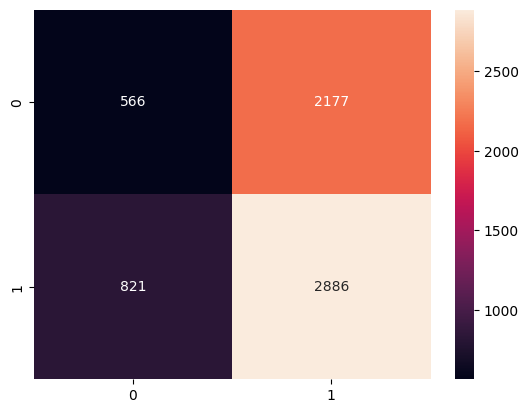

In [ ]:
# Conf Matrix
sns_matrix= sns.heatmap(confusion_matrix_Appraisal, annot= True, fmt='g')

In [ ]:
sns_matrix.figure.savefig("Conf_mat_App_Flant5_ZSC.png")

# Multi-Class Classification

## Loading Data

In [ ]:
attitude_data = pd.read_excel('/content/Edus+Annotations Only Yes Appraisal Data.xlsx')
attitude_data

,Annotated Text,Label,Anno_name_x,matches,Edu Speech,Anno_name_y,Appraisal?
0,wishes to express its satisfaction,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,Uruguay wishes to express its satisfaction for...,Uruguay wishes to express its satisfaction for...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes
1,we want to thank,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,"At the outset, we want to thank the United Sta...","At the outset, we want to thank the United Sta...",UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes
2,is very pleased,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,Uruguay is very pleased to join the rest of th...,Uruguay is very pleased to join the rest of th...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes
3,problem,appreciation-negative,UNSC_2016_SPV.7643_spch018_ann_Uruguay,that dealing with this problem can no longer b...,that dealing with this problem can no longer b...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes
4,voted in favour,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,"For all of those reasons, therefore, Uruguay v...","For all of those reasons, therefore, Uruguay v...",UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes
...,...,...,...,...,...,...,...
2738,crisis,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,and show the way towards a political solution ...,and show the way towards a political solution ...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes
2739,crisis,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,and show the way towards a political solution ...,and show the way towards a political solution ...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes
2740,criminal decree,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,that are currently enshrined in the criminal d...,that are currently enshrined in the criminal d...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes
2741,extremely significant consequences,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,That would have extremely significant conseque...,That would have extremely significant conseque...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes


In [ ]:
# Extracting gold labels from data-subset of 10 speeches
gold_labels_attitude= []
for i in range(attitude_data.shape[0]):
  gold_labels_attitude.append(attitude_data.iloc[i]["Label"])

In [ ]:
# Getting examples to classify from dataset
# Size of dataset (rows)
size_dataset = attitude_data.shape[0]

examples_classify_attitude = [] #- list for examples to classify

# Extracting all text examples to classify from dataset
for i in range(size_dataset):
  examples_classify_attitude.append(attitude_data.iloc[i]["Edu Speech"])

In [ ]:
# Labels
attitude_labels = ['affect-positive', 'affect-negative', 'appreciation-positive', 'appreciation-negative', 'judgement-positive', 'judgement-negative']

## Loading Model

In [ ]:
# Fitting model
model_att = Text2TextZeroShotClassifier("google/flan-t5-base")
model_att.fit(None, attitude_labels)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Text2TextZeroShotClassifier()

### Predictions

In [ ]:
# Predicting labels
outputs= model_att.predict(examples_classify_attitude)

100%|██████████| 2743/2743 [35:06<00:00,  1.30it/s]


In [ ]:
# Converting array outputs into list
predicted_labels_attitude = outputs.tolist()

In [ ]:
# Adding predicted labels to original dataframe
attitude_data['Predicted Attitude Flan-T5-ZSC']=pd.Series(outputs)
attitude_data

,Annotated Text,Label,Anno_name_x,matches,Edu Speech,Anno_name_y,Appraisal?,Predicted Attitude Flan-T5-ZSC
0,wishes to express its satisfaction,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,Uruguay wishes to express its satisfaction for...,Uruguay wishes to express its satisfaction for...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes,appreciation-positive
1,we want to thank,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,"At the outset, we want to thank the United Sta...","At the outset, we want to thank the United Sta...",UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes,appreciation-positive
2,is very pleased,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,Uruguay is very pleased to join the rest of th...,Uruguay is very pleased to join the rest of th...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes,appreciation-positive
3,problem,appreciation-negative,UNSC_2016_SPV.7643_spch018_ann_Uruguay,that dealing with this problem can no longer b...,that dealing with this problem can no longer b...,UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes,affect-negative
4,voted in favour,affect-positive,UNSC_2016_SPV.7643_spch018_ann_Uruguay,"For all of those reasons, therefore, Uruguay v...","For all of those reasons, therefore, Uruguay v...",UNSC_2016_SPV.7643_spch018_ann_Uruguay,yes,judgement-positive
...,...,...,...,...,...,...,...,...
2738,crisis,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,and show the way towards a political solution ...,and show the way towards a political solution ...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes,affect-positive
2739,crisis,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,and show the way towards a political solution ...,and show the way towards a political solution ...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes,affect-positive
2740,criminal decree,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,that are currently enshrined in the criminal d...,that are currently enshrined in the criminal d...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes,judgement-negative
2741,extremely significant consequences,appreciation-negative,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,That would have extremely significant conseque...,That would have extremely significant conseque...,UNSC_2014_SPV.7154_spch021_ann_Russian_Federation,yes,affect-negative


In [ ]:
attitude_data['Predicted Attitude Flan-T5-ZSC'].value_counts()

affect-negative          1630
appreciation-positive     579
judgement-negative        280
affect-positive           199
judgement-positive         52
appreciation-negative       3
Name: Predicted Attitude Flan-T5-ZSC, dtype: int64

In [ ]:
# Saving file with predicted labels with BART
attitude_data.to_csv('Results Attitude Flan-T5-ZSC.csv', index=False)

### Evaluation

In [ ]:
# Calculating accuracy-
accuracy_attitude = accuracy_score(predicted_labels_attitude, gold_labels_attitude)
print("Accuracy score: {:.2f}".format(accuracy_attitude*100))

Accuracy score: 15.17


In [ ]:
# Classification Report -
# y_true, y_pred, labels= xxx
print(classification_report(gold_labels_attitude, predicted_labels_attitude))

                       precision    recall  f1-score   support

      affect-negative       0.08      0.73      0.15       183
      affect-positive       0.21      0.12      0.15       354
appreciation-negative       0.00      0.00      0.00       607
appreciation-positive       0.12      0.61      0.19       109
   judgement-negative       0.59      0.13      0.21      1308
   judgement-positive       0.17      0.05      0.08       182

             accuracy                           0.15      2743
            macro avg       0.19      0.27      0.13      2743
         weighted avg       0.33      0.15      0.14      2743



In [ ]:
# Confusion Matrix
# y_true, y_pred, labels= xxx
confusion_matrix_Attitude_T5 = confusion_matrix(gold_labels_attitude, predicted_labels_attitude, labels=attitude_labels)

In [ ]:
confusion_matrix_Attitude_T5

array([[  42,   13,  274,    0,    9,   16],
       [   2,  134,   13,    1,    0,   33],
       [  15,   19,   67,    1,    2,    5],
       [  81,  395,   79,    0,    5,   47],
       [  25,   38,   95,    0,    9,   15],
       [  34, 1031,   51,    1,   27,  164]])

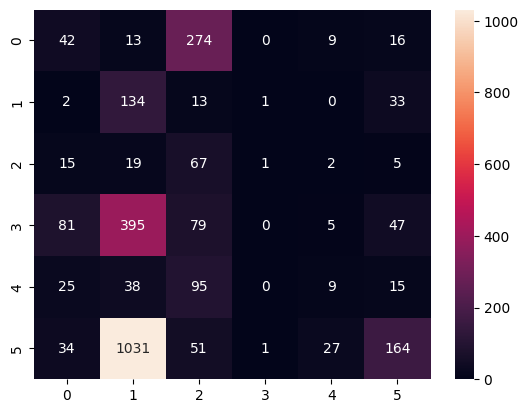

In [ ]:
# Conf Matrix
sns_matrix_att_T5 = sns.heatmap(confusion_matrix_Attitude_T5, annot= True, fmt='g')

In [ ]:
sns_matrix_att_T5.figure.savefig("Conf_mat_Attitude_Flan_T5_ZSC.png")